## Introduction to Scikit-learn

In [50]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('data/Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate_school,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
my_lr = LogisticRegression() # as a best practice: explicitly provide every keyword parameter to the model when you create the object
my_lr

LogisticRegression()

In [30]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr

LogisticRegression(C=0.1, solver='liblinear')

In [31]:
X = df.EDUCATION[0:10].values.reshape(-1,1)
X.shape

(10, 1)

In [32]:
y = df['default payment next month'][0:10].values
y.shape

(10,)

In [33]:
my_lr.fit(X,y) # after this command the 'my_lr' object is a trained model!

LogisticRegression(C=0.1, solver='liblinear')

In [34]:
new_X = df.EDUCATION[10:20].values.reshape(-1,1)
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

### Generating synthetic data

In [36]:
from numpy.random import default_rng

rg = default_rng(12345)
X = rg.uniform(low=0, high=10, size=(1000,)) # one-dimensional vector 1000x1

In [37]:
slope = 0.25
intercept = -1.25

y = slope * X + intercept + rg.normal(loc=0.0, scale=1.0, size=(1000, ))

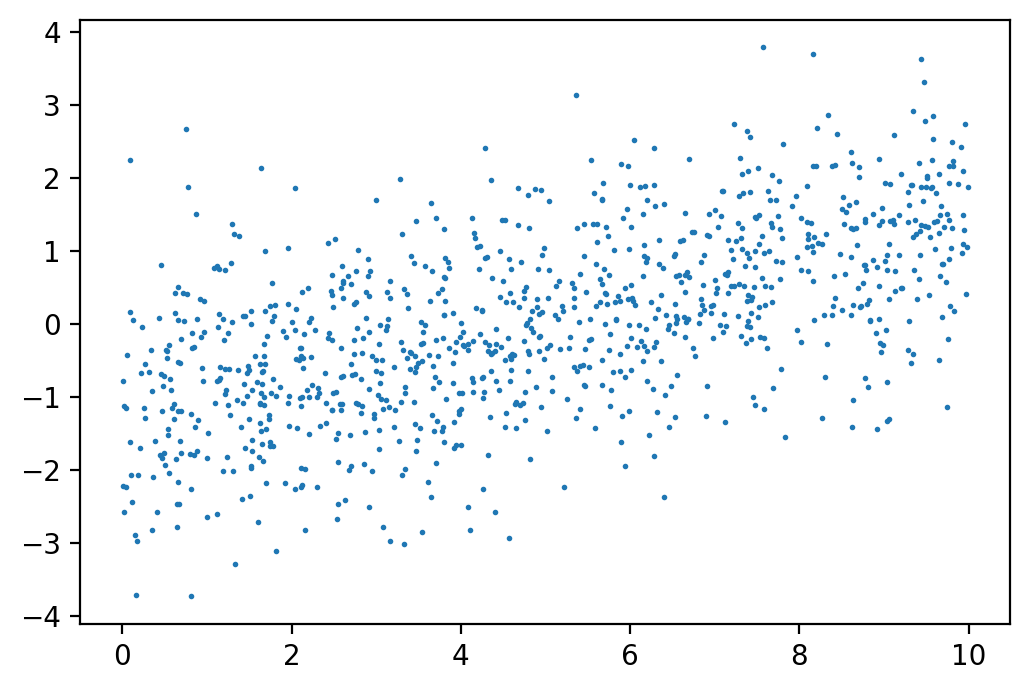

In [40]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.dpi'] = 200 # 'dots per inch' selection

plt.scatter(X,y,s=1)
plt.show()

## Linear regression in Scikit-learn

In [42]:
from sklearn.linear_model import LinearRegression

my_linearR = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
my_linearR

LinearRegression()

In [44]:
y.shape

(1000,)

In [47]:
my_linearR.fit(X.reshape(-1,1), y)

LinearRegression()

In [48]:
my_linearR.coef_

array([0.25711689])

In [49]:
my_linearR.intercept_

-1.2522197212675905

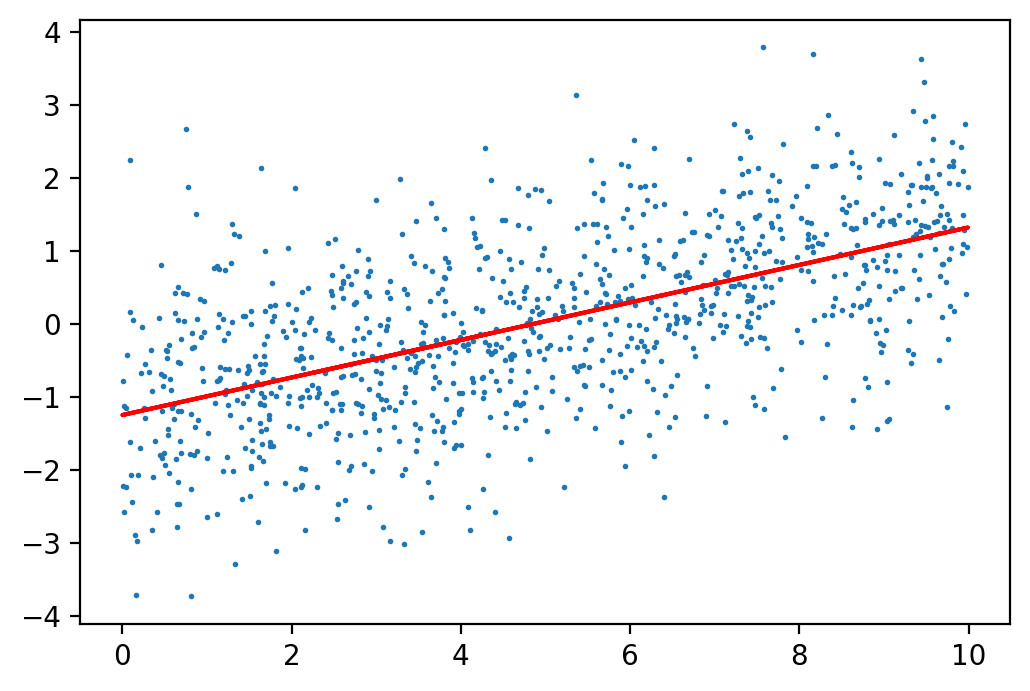

In [57]:
x_ = np.linspace(0, 10, 1000)
# l = X*my_linearR.coef_ + my_linearR.intercept_
y_pred = my_linearR.predict(X.reshape(-1,1))

# plt.plot(X, l, color='purple')
plt.plot(X, y_pred, color='red')
plt.scatter(X,y,s=1)

plt.show()

## Split the train and test data

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.EDUCATION.values.reshape(-1,1), df['default payment next month'].values, test_size=0.2, random_state=24)


In [68]:
n_rows_X_train = X_train.shape[0]
n_rows_X_test = X_test.shape[0]
n_rows_X_train/(n_rows_X_train + n_rows_X_test) # CHECK!

0.799992499249925

In [72]:
np.mean(y_train)

0.223102526838873

In [74]:
np.mean(y_test)

0.21657603600225014

In [76]:
np.mean(np.append(y_train, y_test))

0.2217971797179718

## Classification Accuracy

In [79]:
from sklearn.linear_model import LogisticRegression

example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)
example_lr

LogisticRegression(C=0.1, solver='liblinear')

In [80]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [81]:
y_pred = example_lr.predict(X_test)

In [82]:
is_correct = y_test == y_pred
np.mean(is_correct)

0.7834239639977498

In [83]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [85]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

If we compare our model 'example_lr'  to a null model that always predicts the majority negative class (which willbe right 78% of the time), an accuracy of 78% is actually not very useful.
There are binary classification metrics that delve a little deepr into how the model is performing for negative and positive samples.